In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import KFold

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv')

In [3]:
data

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [4]:
data['mapping'] = (data['card'] == 'yes').astype(int)

In [5]:
X = data.drop(['mapping', 'card'], axis=1)
y = data[['mapping']]

In [6]:
# Split into 60:20:20 ==> Train/Validation/Test sets

train_size_ratio = 0.6
test_size_ratio = 0.2

X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=train_size_ratio)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=test_size_ratio)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(791, 11)
(791, 1)
(422, 11)
(422, 1)
(106, 11)
(106, 1)


(None, None)

In [7]:
# Calculate AUC-ROC Scores for numerical columns

columns_auc_roc = ['reports', 'dependents', 'active', 'share']

for i in columns_auc_roc:

    roc_auc_value = roc_auc_score(y_train, X_train[i])

    if (roc_auc_value < 0.5):
        roc_auc_value = roc_auc_score(y_train, -X_train[i])
        print(i, roc_auc_value)
    else:
        print(i, roc_auc_value)

reports 0.6975995630685481
dependents 0.502327913473247
active 0.6273279134732469
share 0.9897885180144689


In [8]:
print(X_train.columns)
print()
print(X_valid.columns)
print()
print(X_test.columns)

Index(['reports', 'age', 'income', 'share', 'expenditure', 'owner', 'selfemp',
       'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

Index(['reports', 'age', 'income', 'share', 'expenditure', 'owner', 'selfemp',
       'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

Index(['reports', 'age', 'income', 'share', 'expenditure', 'owner', 'selfemp',
       'dependents', 'months', 'majorcards', 'active'],
      dtype='object')


In [9]:
categorical_colums = [
    'owner',
    'selfemp'
]

numerical_colums = ['reports',
    'age',
    'income',
    'share',
    'expenditure',
    'dependents',
    'months',
    'majorcards',
    'active'
]

In [10]:
col_feat = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

train_dicts = X_train[col_feat].to_dict(orient='records')
dictvect = DictVectorizer(sparse = False) 
X_train = dictvect.fit_transform(train_dicts)

val_dicts = X_valid[col_feat].to_dict(orient='records')
X_valid = dictvect.transform(val_dicts)

In [11]:
logreg = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [12]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict_proba(X_valid)[:,1]
round(roc_auc_score(y_valid, y_pred), 3)

c:\Users\Sriniketh J\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.997

In [ ]:
# scores=[]

# for trs in np.linspace(0.0, 1.0, 101): 
    
#     actual_positive = (y_valid == 1)
#     actual_negative = (y_valid == 0)

#     predict_positive = (y_pred >= trs)
#     predict_negative = (y_pred < trs)

#     tp = (predict_positive & actual_positive).sum()
#     tn = (predict_negative & actual_negative).sum()

#     fp = (predict_positive & actual_negative).sum()
#     fn = (predict_negative & actual_positive).sum()

#     scores.append((trs, tp, fp, fn, tn))

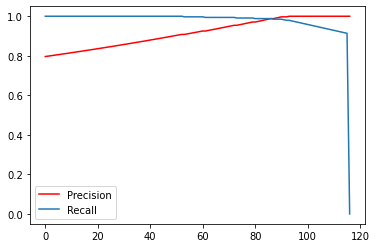

In [16]:
precision, recall, thresholds = precision_recall_curve(y_valid, y_pred)

plt.plot(precision, 'r', label = 'Precision')
plt.plot(recall, label = 'Recall')
plt.legend()
plt.show()

In [17]:
# # Calculate F1-Score

# X_train_scores = X_train

# X_train_scores['f1'] = 2 * X_train_scores['precision'] * X_train_scores['recall']\
#                   / (X_train_scores['precision'] + X_train_scores['recall'])

# # plot
# plt.plot(X_train_scores['threshold'], X_train_scores['f1'], label='f1')
# plt.legend()

In [ ]:
dicts_full_train = X.to_dict(orient='records')
X_full_train = dictvect.transform(dicts_full_train)
y_full_train = data['mapping'].values
roc_auc_scores_list = []


kfolds = KFold(n_splits=5, shuffle=True, random_state=1)
for train_index, val_index in kfolds.split(X_full_train):
    X_train, X_val = X_full_train[train_index], X_full_train[val_index]
    y_full_train, y_val = y_full_train[train_index], y_full_train[val_index]
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_full_train)
    y_pred = model.predict(X_val)
    roc_auc_iter = roc_auc_score(y_val, y_pred)
    print('roc_auc_score = ' + str(roc_auc_iter))
    roc_auc_scores_list.append(roc_auc_iter)

roc_auc_std_5_folds = np.array(roc_auc_scores_list).std()
roc_auc_std_rounded = round(roc_auc_std_5_folds, )
print()
print(f'Standard Deviation on 5 kfolds = ' + str(roc_auc_std_rounded))

In [ ]:
mean_scores = {}

for C in  [0.01, 0.1, 1, 10]:
    scores=[]

    # Iteration over different folds
    for train_idx, val_idx in kf.split(X_train):
        X_train = X_train.iloc[train_idx]
        X_valid = X_train.iloc[val_idx]
    
        X_train_dicts, y_train = data_prep(X_train)
        X_valid_dicts, y_val = data_prep(X_valid)
    
        dictvect = DictVectorizer(sparse = False)
        X_train = dictvect.fit_transform(X_train_dicts)
        X_val = dictvect.transform(X_valid_dicts)
    
        lr = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        lr.fit(X_train, y_train)
    
        y_pred = lr.predict_proba(X_val)[:, 1]
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    
    mean_scores[C] = [round(np.mean(scores), 3), round(np.std(scores), 3)]
    
display(mean_scores)